In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('sample_data/sampledatafoodsales.csv')
df.head()

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
0,1/1/2020,East,Boston,Bars,Carrot,33,1.77,58.41
1,1/4/2020,East,Boston,Crackers,Whole Wheat,87,3.49,303.63
2,1/7/2020,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46
3,1/10/2020,East,New York,Cookies,Chocolate Chip,82,1.87,153.34
4,1/13/2020,East,Boston,Cookies,Arrowroot,38,2.18,82.84


In [4]:
df.dtypes

OrderDate      object
Region         object
City           object
Category       object
Product        object
Quantity        int64
UnitPrice     float64
TotalPrice    float64
dtype: object

In [5]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [6]:
df.dtypes

OrderDate     datetime64[ns]
Region                object
City                  object
Category              object
Product               object
Quantity               int64
UnitPrice            float64
TotalPrice           float64
dtype: object

In [7]:
df.isnull().sum()

OrderDate     0
Region        0
City          0
Category      0
Product       0
Quantity      0
UnitPrice     0
TotalPrice    0
dtype: int64

In [8]:
df_new = df[['Quantity', 'UnitPrice', 'TotalPrice']]
df_new.head()

,Quantity,UnitPrice,TotalPrice
0,33,1.77,58.41
1,87,3.49,303.63
2,58,1.87,108.46
3,82,1.87,153.34
4,38,2.18,82.84


In [11]:
quan = df['Quantity']
tp = df['TotalPrice']

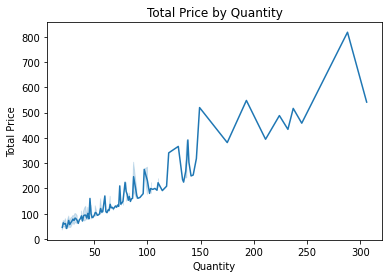

In [22]:
sns.lineplot(x=quan,y=tp)

plt.title("Total Price by Quantity")
plt.xlabel("Quantity")
plt.ylabel("Total Price")

plt.show()

In [18]:
df['year'] = df['OrderDate'].apply(lambda OrderDate:OrderDate.year)
df['month'] = df['OrderDate'].apply(lambda OrderDate: OrderDate.month)

In [20]:
m = df['month']
ye = df['year']

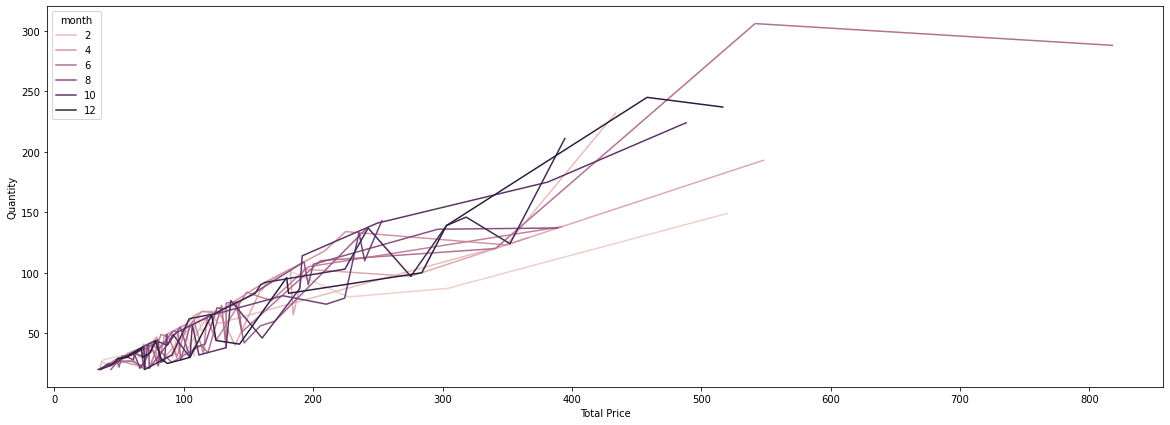

In [68]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df, x="TotalPrice", y="Quantity", hue="month")


plt.xlabel("Total Price")
plt.ylabel("Quantity")
plt.show()

In [27]:
df.head()

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice,year,month
0,2020-01-01,East,Boston,Bars,Carrot,33,1.77,58.41,2020,1
1,2020-01-04,East,Boston,Crackers,Whole Wheat,87,3.49,303.63,2020,1
2,2020-01-07,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46,2020,1
3,2020-01-10,East,New York,Cookies,Chocolate Chip,82,1.87,153.34,2020,1
4,2020-01-13,East,Boston,Cookies,Arrowroot,38,2.18,82.84,2020,1


In [28]:
df['Category'].unique()

array(['Bars', 'Crackers', 'Cookies', 'Snacks'], dtype=object)

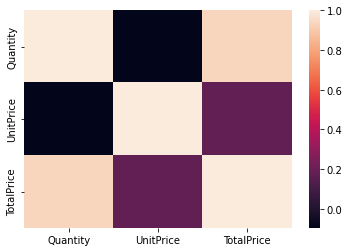

In [41]:
sns.heatmap(df_new.corr())

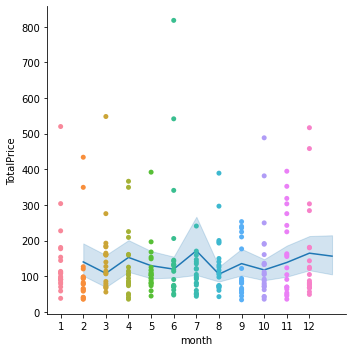

In [46]:
sns.catplot(x="month", y="TotalPrice", data=df, jitter=False)
sns.lineplot(x="month", y="TotalPrice", data=df)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


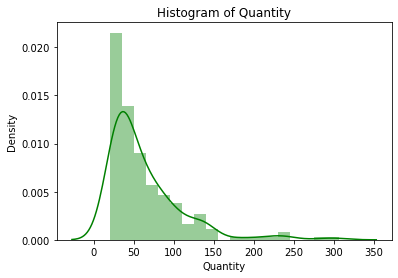

In [67]:
sns.distplot(a=df['Quantity'],color="g")

plt.title("Histogram of Quantity")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


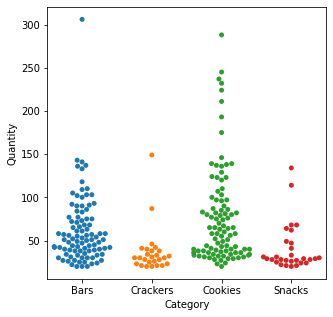

In [66]:
plt.figure(figsize=(5,5))

sns.swarmplot(x=df['Category'],y=df['Quantity'],data=df)

plt.xlabel("Category")
plt.ylabel("Quantity")


plt.show()

In [53]:
df_new.head()

,Quantity,UnitPrice,TotalPrice
0,33,1.77,58.41
1,87,3.49,303.63
2,58,1.87,108.46
3,82,1.87,153.34
4,38,2.18,82.84


In [54]:
X = df[['Quantity', 'UnitPrice']]
y = df['TotalPrice']

In [55]:
X.head()

,Quantity,UnitPrice
0,33,1.77
1,87,3.49
2,58,1.87
3,82,1.87
4,38,2.18


In [56]:
y.head()

0     58.41
1    303.63
2    108.46
3    153.34
4     82.84
Name: TotalPrice, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(X_test)

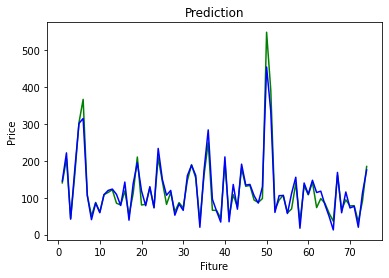

In [61]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Fiture')
plt.ylabel('Price')
plt.title('Prediction')
plt.show()

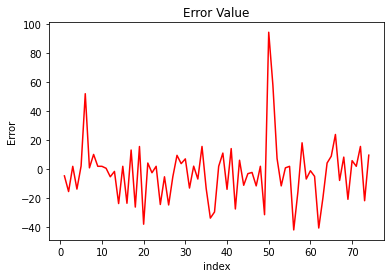

In [62]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='red',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [63]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 441.7347945264126
r square : 0.9384001229028831


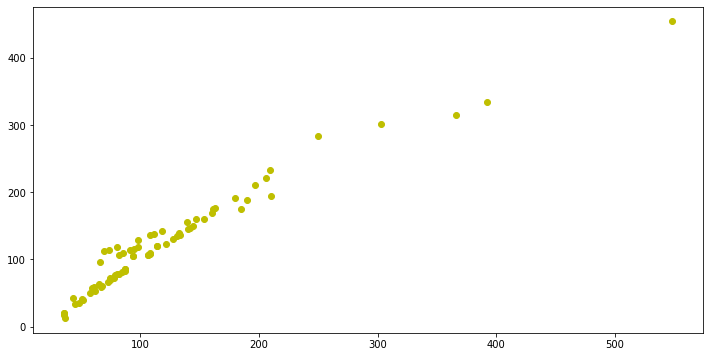

In [64]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='y',linestyle='-')
plt.show()

In [65]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: -118.14975952963641
Coefficient of the line: [ 2.17819846 53.4458349 ]
